 # CS-C3240 Machine Learning D. Final Project. Full report

# Drug Consumption Dataset. 

Student : Reyver Serna. 
Student ID number: 986108. 
reyver.sernalerma@aalto.fi


Drug consumption (quantified) data set  used from the UCI Machine Learning Repository

Thus is a multivariate dataset that counts with 1885 instances, 32 attributes. The associated tasks are classification.  In this particular case, I will be using  the ML model of Logistic Regression. The aim of this project is to classify those who consume drugs and those who does not. 

Data Set Information:

Database contains records for 1885 respondents. For each respondent 12 attributes are known: Personality measurements which include NEO-FFI-R (neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness), BIS-11 (impulsivity), and ImpSS (sensation seeking), level of education, age, gender, country of residence and ethnicity. All input attributes are originally categorical and are quantified. After quantification values of all input features can be considered as real-valued. In addition, participants were questioned concerning their use of 18 legal and illegal drugs (alcohol, amphetamines, amyl nitrite, benzodiazepine, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, nicotine and volatile substance abuse and one fictitious drug (Semeron) which was introduced to identify over-claimers. For each drug they have to select one of the answers: never used the drug, used it over a decade ago, or in the last decade, year, month, week, or day.

Database contains 18 classification problems. Each of independent label variables contains seven classes: "Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", and "Used in Last Day".

In [1]:
# First, we need to improt the necessary libraries to explore and pre-process, and build the Logistic Regression Model
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Importing the model, split the data into training and test and accuracy score from the Sklearn library
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

Fontconfig error: Cannot load default config file: No such file: (null)


In [2]:
#Load the Drug Consumption csv data from the Jupyter environment using the 'pd.read_csv' function
#Save this data in a variable called "data"
data = pd.read_csv("Drug_Consumption_Quantified.csv")
copy_df = data.copy()        #make a copy of the dataframe

#Let's have a look to the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           1885 non-null   int64  
 1   Age          1885 non-null   float64
 2   Gender       1885 non-null   float64
 3   Education    1885 non-null   float64
 4   Country      1885 non-null   float64
 5   Ethnicity    1885 non-null   float64
 6   Nscore       1885 non-null   float64
 7   Escore       1885 non-null   float64
 8   Oscore       1885 non-null   float64
 9   Ascore       1885 non-null   float64
 10  Cscore       1885 non-null   float64
 11  Impulsivity  1885 non-null   float64
 12  SS           1885 non-null   float64
 13  Alcohol      1885 non-null   object 
 14  Amphet       1885 non-null   object 
 15  Amyl         1885 non-null   object 
 16  Benzos       1885 non-null   object 
 17  Caff         1885 non-null   object 
 18  Cannabis     1885 non-null   object 
 19  Choc  

In [3]:
#Check the first 5 rows of the dataset
data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [4]:
# Check the statistical features of the datase using the function 'pd.describe()'
data.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsivity,SS
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [6]:
#Check if any of the feature columns have null or missing  values
print(data.isna().sum())
print()
print("Great! It seems that non of the feature columns have null values. Therefore, we do not need to clean or convert null   values")

ID             0
Age            0
Gender         0
Education      0
Country        0
Ethnicity      0
Nscore         0
Escore         0
Oscore         0
Ascore         0
Cscore         0
Impulsivity    0
SS             0
Alcohol        0
Amphet         0
Amyl           0
Benzos         0
Caff           0
Cannabis       0
Choc           0
Coke           0
Crack          0
Ecstasy        0
Heroin         0
Ketamine       0
Legalh         0
LSD            0
Meth           0
Mushrooms      0
Nicotine       0
Semer          0
VSA            0
dtype: int64

Great! It seems that non of the feature columns have null values. Therefore, we do not need to clean or convert null   values


In [7]:
#Let's drop the ID of the data. It messes up the feature correlation
data = data.drop('ID', axis=1)

In [8]:
data.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [9]:
#Converting the 'CL' categorical variables into a cumulative probability of regular use based on most recent case of use. 
#This might help model building.
temp = data.columns
temp = temp[12:]
for i in temp:
    data[i] = data[i].map({'CL0':0,'CL1':1/6,'CL2':2/6,'CL3':3/6,'CL4':4/6,'CL5':5/6,'CL6':6/6})

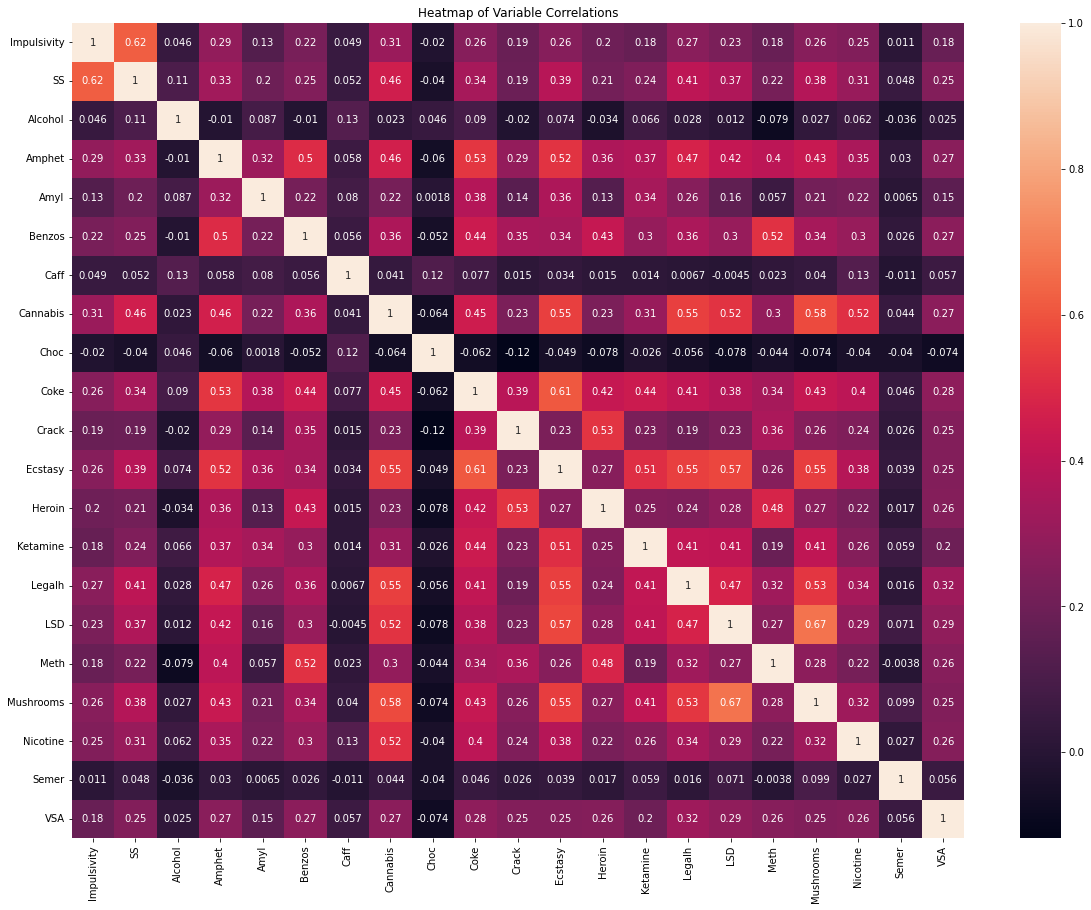

In [10]:
# Check how the variables are correlated. This will help for the feature selection and encoding for the future Logistic Regression
plt.figure(figsize=(20,15))
sns.heatmap(data.drop(['Age','Gender','Education','Country','Ethnicity', 'Nscore', 'Escore','Oscore', 'Ascore', 'Cscore',],axis=1).corr(),annot=True)
plt.title('Heatmap of Variable Correlations')
plt.show()

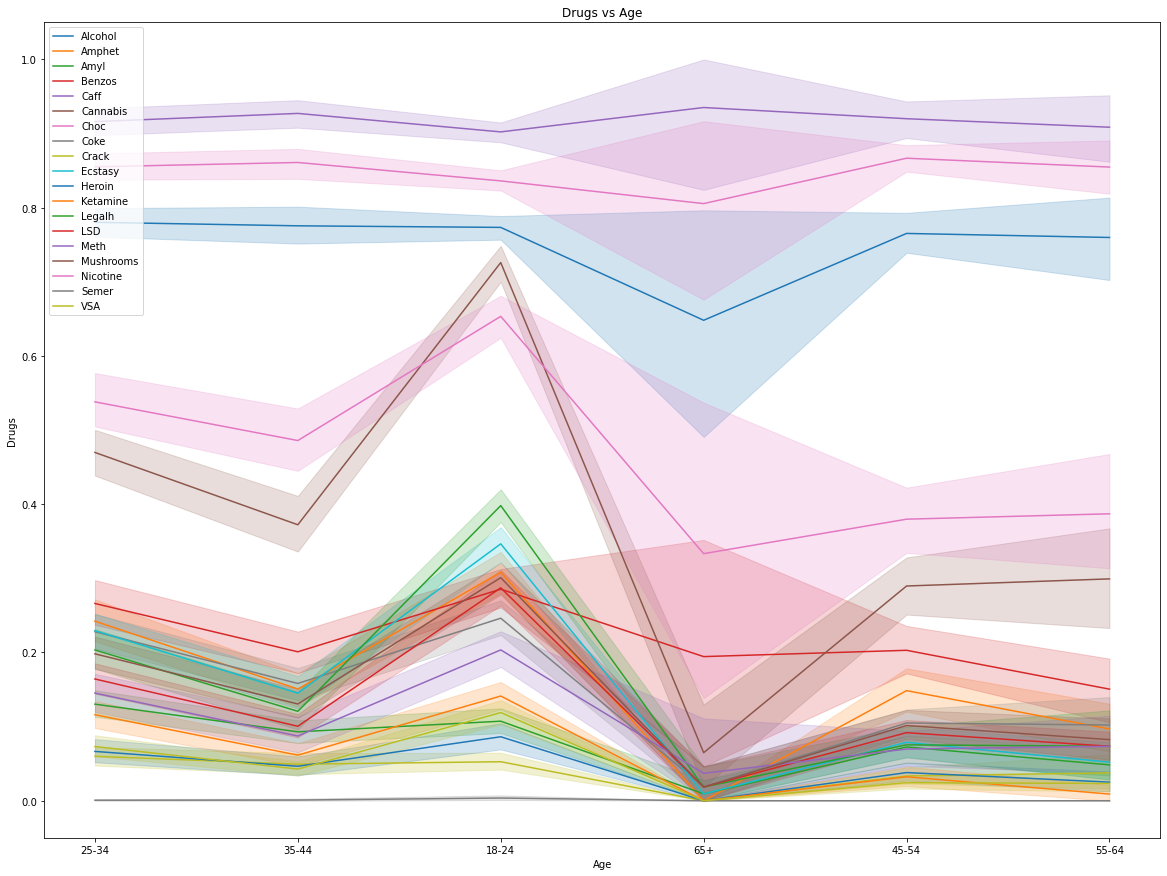

In [11]:
#Let's plot the different feautre in relation with age  using  the function 'plt'

#For this I need the data where the age, gender and ethnicity features are not quantified. This data will be stored in a variable calle "data2"
data2 = pd.read_csv("Drug_Consumption.csv")

#Again lets convert the 'CL' categorical variables into a cumulative probability of regular use based on most recent case of use. 
#This might help model building.
temp = data.columns
temp = temp[12:]
for i in temp:
    data2[i] = data2[i].map({'CL0':0,'CL1':1/6,'CL2':2/6,'CL3':3/6,'CL4':4/6,'CL5':5/6,'CL6':6/6})

plt.figure(figsize=(20,15))
sns.lineplot(data2.Age, data2.Alcohol, label='Alcohol')
sns.lineplot(data2.Age, data2.Amphet, label='Amphet')
sns.lineplot(data2.Age, data2.Amyl, label='Amyl')
sns.lineplot(data2.Age, data2.Benzos, label='Benzos')
sns.lineplot(data2.Age, data2.Caff, label='Caff')
sns.lineplot(data2.Age, data2.Cannabis, label='Cannabis')
sns.lineplot(data2.Age, data2.Choc, label='Choc')
sns.lineplot(data2.Age, data2.Coke, label='Coke')
sns.lineplot(data2.Age, data2.Crack, label='Crack')
sns.lineplot(data2.Age, data2.Ecstasy, label='Ecstasy')
sns.lineplot(data2.Age, data2.Heroin, label='Heroin')
sns.lineplot(data2.Age, data2.Ketamine, label='Ketamine')
sns.lineplot(data2.Age, data2.Legalh, label='Legalh')
sns.lineplot(data2.Age, data2.LSD, label='LSD')
sns.lineplot(data2.Age, data2.Meth, label='Meth')
sns.lineplot(data2.Age, data2.Mushrooms, label='Mushrooms')
sns.lineplot(data2.Age, data2.Nicotine, label='Nicotine')
sns.lineplot(data2.Age, data2.Semer, label='Semer')
sns.lineplot(data2.Age, data2.VSA, label='VSA')
plt.legend(loc='upper left')
plt.title('Drugs vs Age')
plt.xlabel('Age')
plt.ylabel('Drugs')
plt.show()

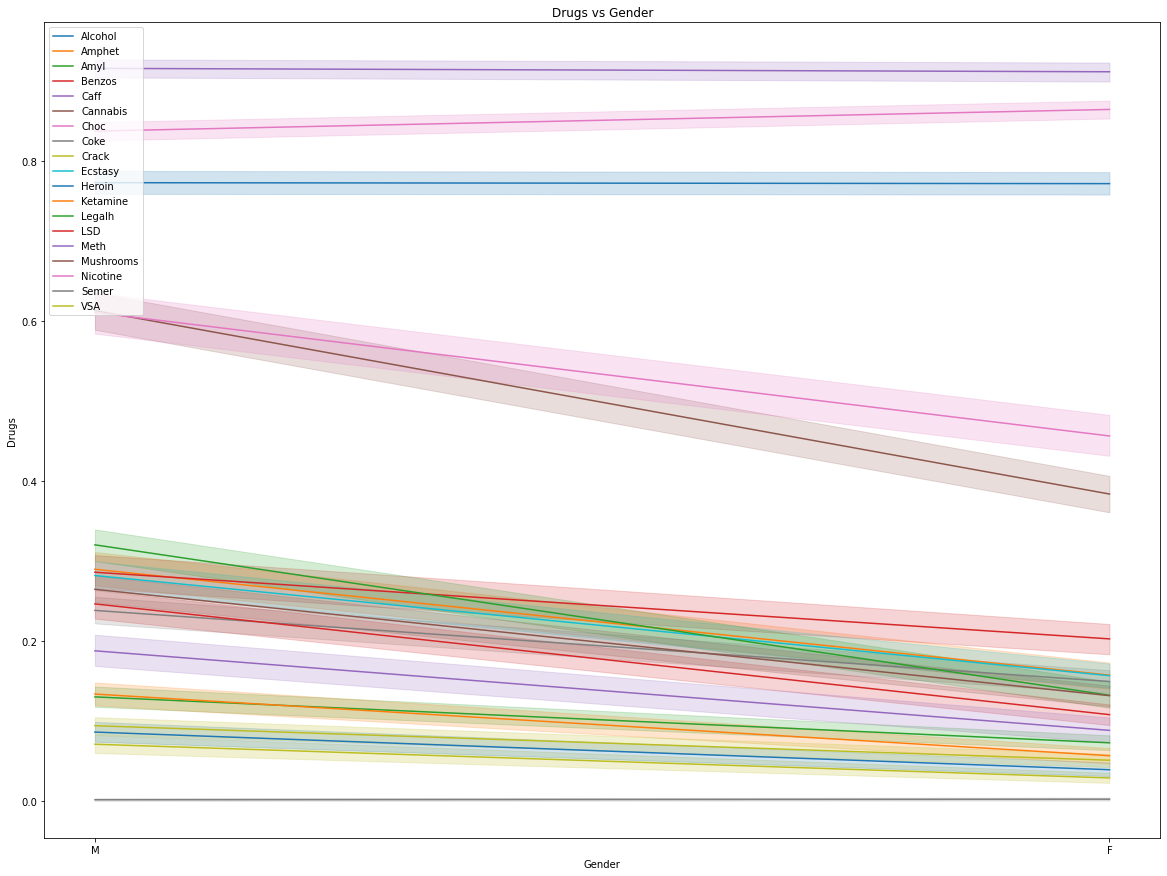

In [12]:
#Let's plot the different feautre in relation with Gender  using  the function 'plt'

plt.figure(figsize=(20,15))
sns.lineplot(data2.Gender, data2.Alcohol, label='Alcohol')
sns.lineplot(data2.Gender, data2.Amphet, label='Amphet')
sns.lineplot(data2.Gender, data2.Amyl, label='Amyl')
sns.lineplot(data2.Gender, data2.Benzos, label='Benzos')
sns.lineplot(data2.Gender, data2.Caff, label='Caff')
sns.lineplot(data2.Gender, data2.Cannabis, label='Cannabis')
sns.lineplot(data2.Gender, data2.Choc, label='Choc')
sns.lineplot(data2.Gender, data2.Coke, label='Coke')
sns.lineplot(data2.Gender, data2.Crack, label='Crack')
sns.lineplot(data2.Gender, data2.Ecstasy, label='Ecstasy')
sns.lineplot(data2.Gender, data2.Heroin, label='Heroin')
sns.lineplot(data2.Gender, data2.Ketamine, label='Ketamine')
sns.lineplot(data2.Gender, data2.Legalh, label='Legalh')
sns.lineplot(data2.Gender, data2.LSD, label='LSD')
sns.lineplot(data2.Gender, data2.Meth, label='Meth')
sns.lineplot(data2.Gender, data2.Mushrooms, label='Mushrooms')
sns.lineplot(data2.Gender, data2.Nicotine, label='Nicotine')
sns.lineplot(data2.Gender, data2.Semer, label='Semer')
sns.lineplot(data2.Gender, data2.VSA, label='VSA')
plt.legend(loc='upper left')
plt.title('Drugs vs Gender')
plt.xlabel('Gender')
plt.ylabel('Drugs')
plt.show()

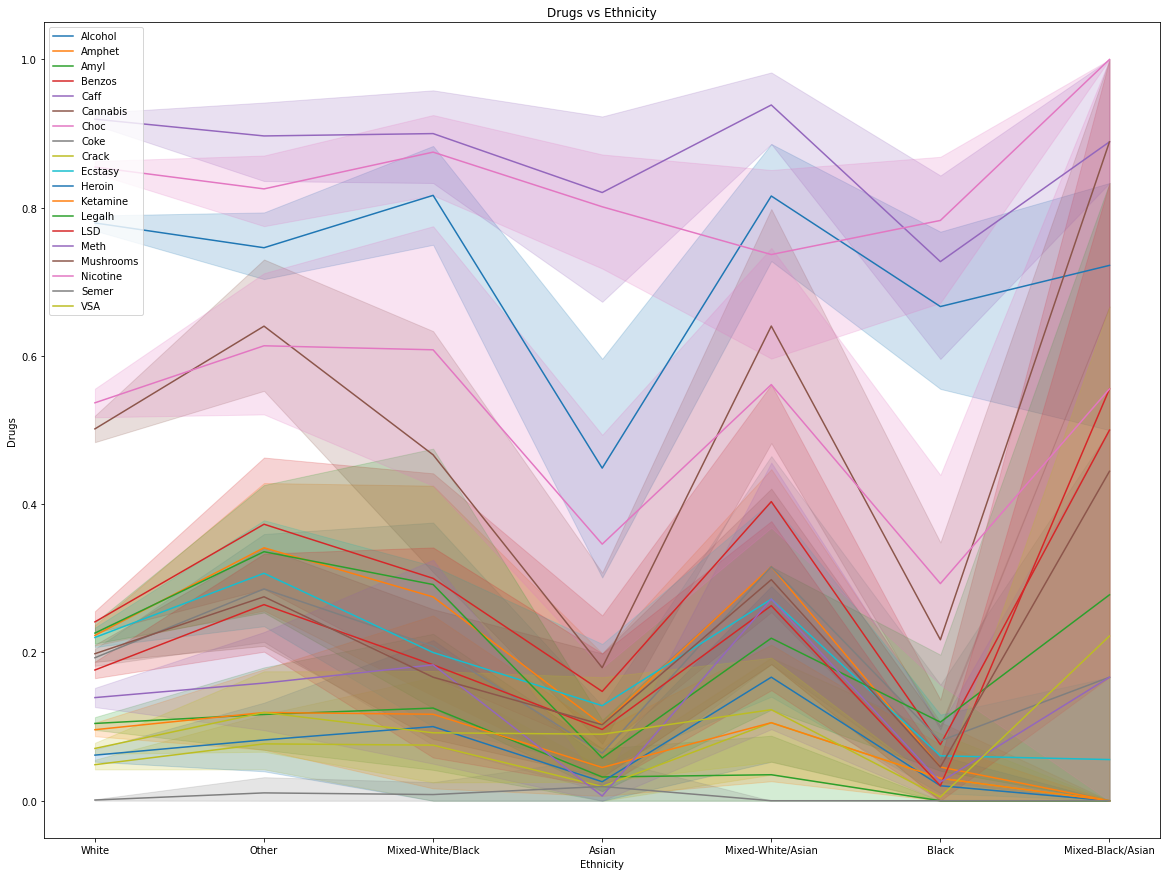

In [13]:
#Let's plot the different feautre in relation with Ethnicity  using  the function 'plt'

plt.figure(figsize=(20,15))
sns.lineplot(data2.Ethnicity, data2.Alcohol, label='Alcohol')
sns.lineplot(data2.Ethnicity, data2.Amphet, label='Amphet')
sns.lineplot(data2.Ethnicity, data2.Amyl, label='Amyl')
sns.lineplot(data2.Ethnicity, data2.Benzos, label='Benzos')
sns.lineplot(data2.Ethnicity, data2.Caff, label='Caff')
sns.lineplot(data2.Ethnicity, data2.Cannabis, label='Cannabis')
sns.lineplot(data2.Ethnicity, data2.Choc, label='Choc')
sns.lineplot(data2.Ethnicity, data2.Coke, label='Coke')
sns.lineplot(data2.Ethnicity, data2.Crack, label='Crack')
sns.lineplot(data2.Ethnicity, data2.Ecstasy, label='Ecstasy')
sns.lineplot(data2.Ethnicity, data2.Heroin, label='Heroin')
sns.lineplot(data2.Ethnicity, data2.Ketamine, label='Ketamine')
sns.lineplot(data2.Ethnicity, data2.Legalh, label='Legalh')
sns.lineplot(data2.Ethnicity, data2.LSD, label='LSD')
sns.lineplot(data2.Ethnicity, data2.Meth, label='Meth')
sns.lineplot(data2.Ethnicity, data2.Mushrooms, label='Mushrooms')
sns.lineplot(data2.Ethnicity, data2.Nicotine, label='Nicotine')
sns.lineplot(data2.Ethnicity, data2.Semer, label='Semer')
sns.lineplot(data2.Ethnicity, data2.VSA, label='VSA')
plt.legend(loc='upper left')
plt.title('Drugs vs Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Drugs')
plt.show()

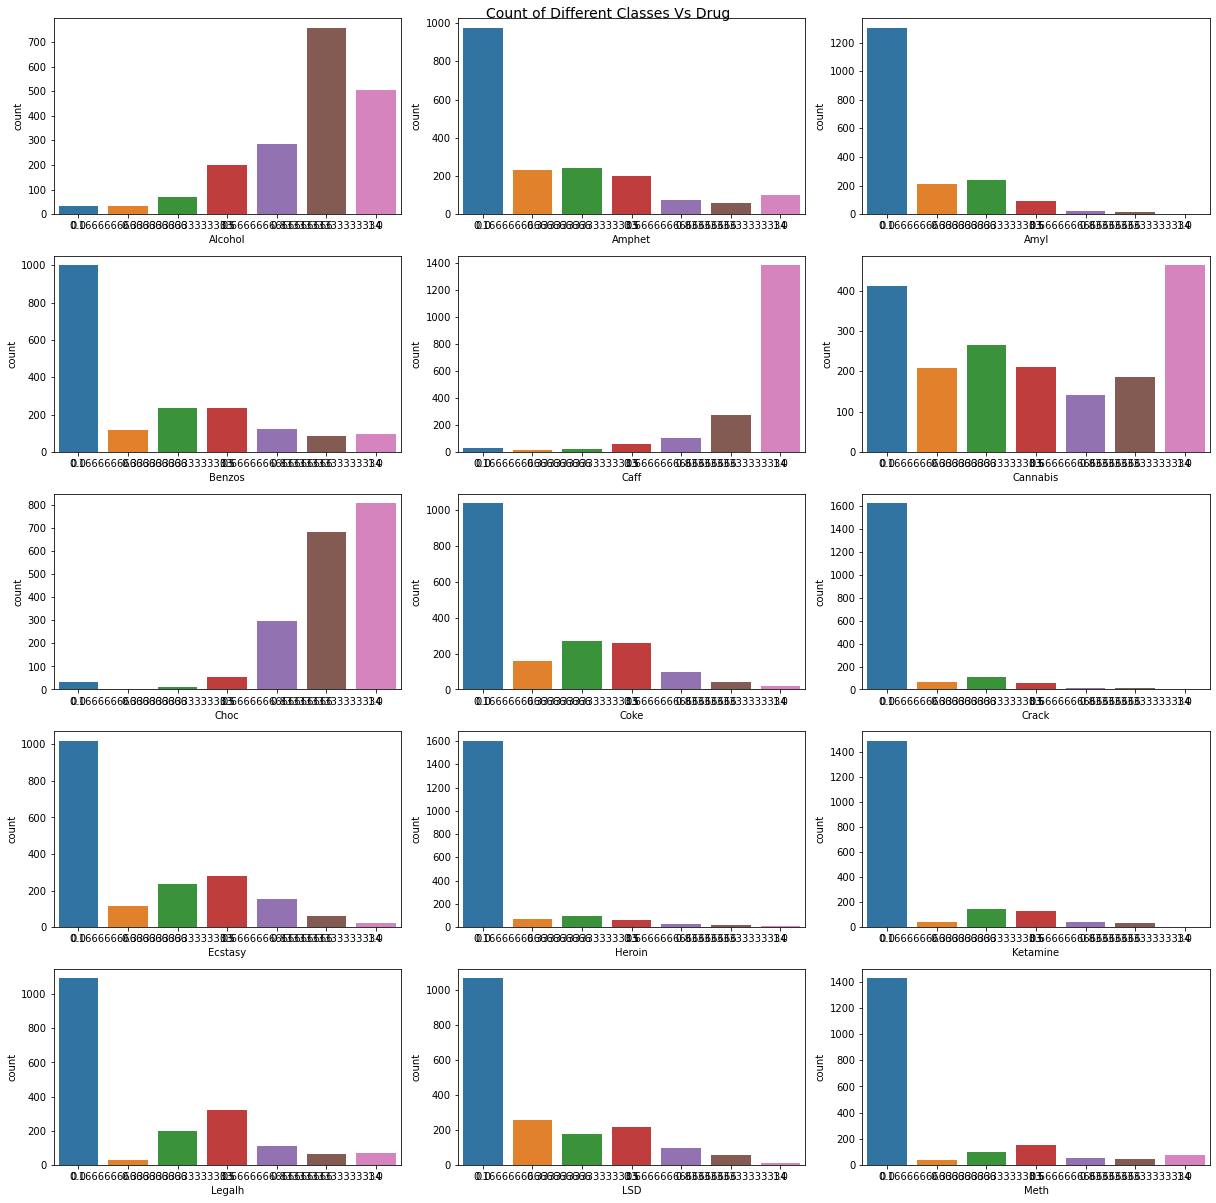

In [14]:
#Since the previous plots seem a bit chaotic and difficult to interpret, 
#let's plot all the drugs in different histograms to count the different drugs in the dataset.
columns = ['Alcohol','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
           'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms','Nicotine', 'Semer', 'VSA']
fig, axes = plt.subplots(5,3,figsize = (17,17))
fig.suptitle("Count of Different Classes Vs Drug",fontsize=14)
k=0
for i in range(5):
    for j in range(3):
        sns.countplot(x=columns[k], data=data2,ax=axes[i][j])
        k+=1

plt.tight_layout()
plt.show()


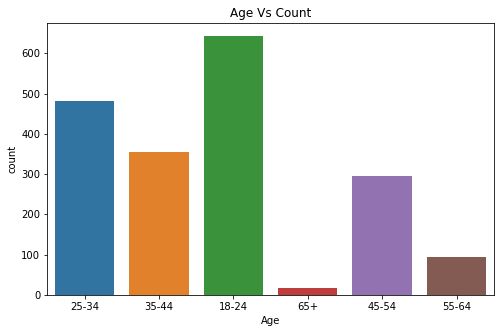

In [15]:
#Let's see how is the count in relation to age
ax = sns.countplot(x='Age', data=data2)
plt.title('Age Vs Count')
ax.figure.set_size_inches(8, 5)

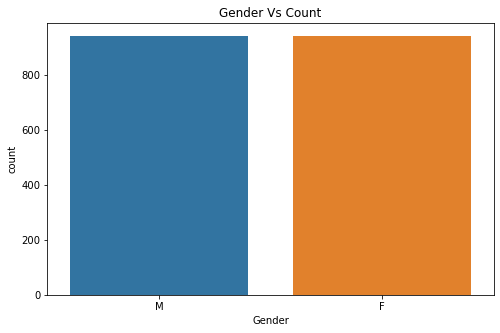

In [16]:
#Let's see hoe is the count in relation to Gender histogram
ax = sns.countplot(x='Gender', data=data2)
plt.title('Gender Vs Count')
ax.figure.set_size_inches(8, 5)

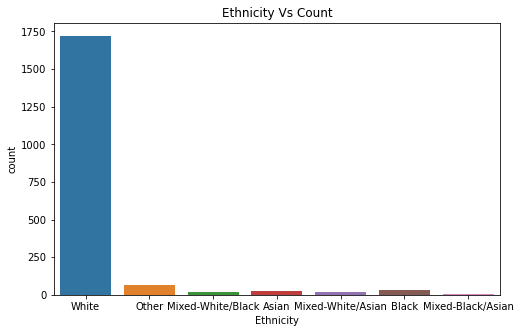

In [17]:
#Let's see hoe is the count in relation to Ethnicity in a histogram
ax = sns.countplot(x='Ethnicity', data=data2)
plt.title('Ethnicity Vs Count')
ax.figure.set_size_inches(8, 5)

# Feature engineering: 

Let's choose three  drugs that a person can consume to set the classifier around it. The dataset has many dimensions, and can become quite complex if I chose all the drugs. Therefore, for the sake of simplicity, I randomly chose  Methamphetamien, LSD, and Ecstasy as the features to be ingeneered for the target varibles.   


In [20]:
# We will re-design this variable, in which applying lambda will set  1 if the person consumes, and 0 if not
meth_df = data.copy()
meth_df['Meth_User'] = meth_df['Meth'].apply(lambda x: 1 if x not in [0,1] else 0)
meth_df = meth_df.drop(['Meth'], axis=1)

In [21]:
meth_df.head(1)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Mushrooms,Nicotine,Semer,VSA,Meth_User
0,0.49788,0.48246,-0.05921,0.96082,0.126,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0


In [22]:
# We will re-design this variable, in which applying lambda will set  1 if the person consumes, and 0 if not

lsd_df = data.copy()
lsd_df['LSD_User'] = lsd_df['LSD'].apply(lambda x: 1 if x not in [0,1] else 0)
lsd_df = lsd_df.drop(['LSD'], axis=1)

In [23]:
lsd_df.head(1)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,Meth,Mushrooms,Nicotine,Semer,VSA,LSD_User
0,0.49788,0.48246,-0.05921,0.96082,0.126,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0


In [24]:
# We will re-design this variable, in which applying lambda will set  1 if the person consumes, and 0 if not
Ecs_df = data.copy()
Ecs_df['Ecstasy_User'] = Ecs_df['Ecstasy'].apply(lambda x: 1 if x not in [0,1] else 0)
Ecs_df = Ecs_df.drop(['Ecstasy'], axis=1)

In [25]:
Ecs_df.head(1)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA,Ecstasy_User
0,0.49788,0.48246,-0.05921,0.96082,0.126,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0


In [26]:
"""This is a function that splits and scales the data for the pre-processing
 the function takes as inputs:
 data =  the data frame of the target variable of the drug we want to punt in our model
 column =  the data frame of the previously ingeneered feature of the chose drug
 
 this function returns the data splitted into training and test set for the selected drug"""

def preprocessing_inputs(data, column):
    data = data.copy()
    
    # Split df into X and y
    y = data[column]
    X = data.drop(column, axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), 
                           index=X_train.index, 
                           columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), 
                          index=X_test.index, 
                          columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

 # Let's check the model  in the training data 

In [44]:
#First applied the pre-processing function to our selected drug
X_train, X_test, y_train, y_test = preprocessing_inputs(meth_df, 'Meth_User')

#Let's build the Logistic Regression model for the selected drug and check its accuracy
clf= LogisticRegression().fit(X_train, y_train)
y_pred =  clf.predict(X_train)
acc = accuracy_score(y_train, y_pred)

print('the accuracy score for the meth in teh model is:',acc)

#Let's check the quality of the our model counting it Minimmun Squared Error, MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_train,y_pred)

print('MSE Meth Train:', MSE)

the accuracy score for the meth in teh model is: 0.8129973474801061
MSE Meth Train: 0.1870026525198939


In [45]:
#First applied the pre-processing function to our selected drug
X_train, X_test, y_train, y_test = preprocessing_inputs(lsd_df, 'LSD_User')

#Let's build the Logistic Regression model for the selected drug and check its accuracy
clf= LogisticRegression().fit(X_train, y_train)
y_pred =  clf.predict(X_train)
acc = accuracy_score(y_train, y_pred)

print('the accuracy score for the LSD in teh model is:',acc)

#Let's check the quality of the our model counting it Minimmun Squared Error, MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_train,y_pred)

print('MSE LSD Train:', MSE)

the accuracy score for the LSD in teh model is: 0.8342175066312998
MSE LSD Train: 0.16578249336870027


In [46]:
#First applied the pre-processing function to our selected drug
X_train, X_test, y_train, y_test = preprocessing_inputs(Ecs_df,'Ecstasy_User')

#Let's build the Logistic Regression model for the selected drug and check its accuracy
clf= LogisticRegression().fit(X_train, y_train)
y_pred =  clf.predict(X_train)
acc = accuracy_score(y_train, y_pred)

print('the accuracy score for the Ecstasy in the model is:',acc)

#Let's check the quality of the our model counting it Minimmun Squared Error, MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_train,y_pred)

print('MSE Ecstasy Train:', MSE)

the accuracy score for the Ecstasy in the model is: 0.8388594164456233
MSE Ecstasy Train: 0.16114058355437666


# Lets's check how the model performs using the test data. 

In [47]:
#Let's apply the pre-processing function to our selected drug
X_train, X_test, y_train, y_test = preprocessing_inputs(meth_df, 'Meth_User')

#Let's build the Logistic Regression model for the selected drug and check its accuracy
clf= LogisticRegression().fit(X_test, y_test)
y_pred =  clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('the accuracy score for the meth in teh model is:',acc)

#Let's check the quality of the our model counting it Minimmun Squared Error, MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,y_pred)

print('MSE Meth test:', MSE)

the accuracy score for the meth in teh model is: 0.8912466843501327
MSE Meth test: 0.10875331564986737


In [48]:
#Let's apply the pre-processing function to our selected drug
X_train, X_test, y_train, y_test = preprocessing_inputs(lsd_df, 'LSD_User')

#Let's build the Logistic Regression model for the selected drug and check its accuracy
clf= LogisticRegression().fit(X_test, y_test)
y_pred =  clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,y_pred)


print('the accuracy score for the Ecstasy in the model is:',acc)
print('MSE LSD test', MSE)

the accuracy score for the Ecstasy in the model is: 0.8381962864721485
MSE LSD test 0.16180371352785147


In [49]:
#Let's apply the pre-processing function to our selected drug
X_train, X_test, y_train, y_test = preprocessing_inputs(Ecs_df,'Ecstasy_User')

#Let's build the Logistic Regression model for the selected drug and check its accuracy
clf= LogisticRegression().fit(X_test, y_test)
y_pred =  clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('the accuracy score for the Ecstasy in the model is:',acc)

#Let's check the quality of the our model counting it Minimmun Squared Error, MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,y_pred)

print('MSE Ecstasy test:', MSE)

the accuracy score for the Ecstasy in the model is: 0.870026525198939
MSE Ecstasy test: 0.129973474801061
